<a href="https://colab.research.google.com/github/Swayamprakashpatel/HPLC/blob/main/HPLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dropout
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
import time as tm

In [29]:
df = pd.read_csv('/content/Data.csv')
df = pd.DataFrame(df)
df = df.iloc[:,:]

X1 = df.iloc[:, 7:11]
X1 = X1.div(100).round(2)

X2 = df.iloc[:,11:12]
X2 = X2.div(14).round(2)

X3 = df.iloc[:, 12:1774]

X = [X1,X2,X3]
X = pd.concat(X, axis=1)

Y_Cat = df.iloc[:, 4:7]

Y_Num = df.iloc[:,75:77]


Y_Num = Y_Num.div(50).round(2)



In [32]:
print(X.shape, Y_Num.shape)

(970, 1767) (970, 2)


In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
print(X)

CLASSIFICATION

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(Y_Cat)
OneHotEncoder(handle_unknown='ignore')
enc.categories_

Y_Cat_OH = enc.transform(Y_Cat).toarray() #Categorical Data
print(Y_Cat_OH,Y_Cat_OH.shape)

print(Y_Cat_OH.shape)



Y2 = Y_Cat_OH

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y2_train, Y2_val_and_test = train_test_split(X, Y2, test_size=0.01,random_state = 42 )
X_val, X_test, Y2_val, Y2_test = train_test_split(X_val_and_test, Y2_val_and_test, test_size=0.5, random_state= 42)

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y2_train = np.asarray(Y2_train).astype(np.int64)
Y2_val = np.asarray(Y2_val).astype(np.int64)
Y2_test = np.asarray(Y2_test).astype(np.int64)


filepath = '/content/drive/My Drive/HPLC_CAT.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=225, verbose =2)]

output_nodes = Y2.shape[1]
print(output_nodes)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1764, activation='relu', input_shape=(1764,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation= 'Softmax')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.8), loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False), metrics=['accuracy'])
hist = model.fit(X_train, Y2_train, epochs= 2000, callbacks=[checkpoint],validation_data=(X_val, Y2_val), batch_size= 150)
model.evaluate(X_test, Y2_test)
 
Y2_train_predict = np.round(model.predict(X_train))
Y2_train_l = tf.argmax(Y2_train, axis = 1)
Y2_train_predict_l = tf.argmax(Y2_train_predict, axis =1)
import sklearn.metrics as skm
cm = skm.multilabel_confusion_matrix(Y2_train_l, Y2_train_predict_l)
print(cm)
print( skm.classification_report(Y2_train_l, Y2_train_predict_l))
 
train_acc = max(hist.history['accuracy'])
val_acc = max(hist.history['val_accuracy'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training Accuracy is')
print(train_acc)
print('Validation Accuracy is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)

In [ ]:
X.isnull().any() 


RT_Drug_1    False
RT_Drug_2    False
fp1          False
fp2          False
fp3          False
             ...  
fp877.1      False
fp878.1      False
fp879.1      False
fp880.1      False
fp881.1      False
Length: 1764, dtype: bool

REGRESSION

6
Epoch 1/10000
10/10 [==============================] - ETA: 0s - loss: 0.1473 - root_mean_squared_error: 0.3838
Epoch 1: val_root_mean_squared_error improved from inf to 0.35565, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
10/10 [==============================] - 1s 59ms/step - loss: 0.1473 - root_mean_squared_error: 0.3838 - val_loss: 0.1265 - val_root_mean_squared_error: 0.3556
Epoch 2/10000
10/10 [==============================] - ETA: 0s - loss: 0.1235 - root_mean_squared_error: 0.3514
Epoch 2: val_root_mean_squared_error improved from 0.35565 to 0.35207, saving model to /content/drive/My Drive/HPLC_NUM.hdf5
10/10 [==============================] - 0s 34ms/step - loss: 0.1235 - root_mean_squared_error: 0.3514 - val_loss: 0.1240 - val_root_mean_squared_error: 0.3521
Epoch 3/10000
 9/10 [==========================>...] - ETA: 0s - loss: 0.1214 - root_mean_squared_error: 0.3484
Epoch 3: val_root_mean_squared_error did not improve from 0.35207
10/10 [=======================

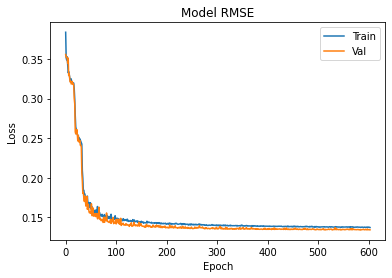

Training RMSE is
0.13708584010601044
Validation RMSE is
0.1339912712574005
Training loss is
0.0187925286591053
Validation loss is
0.01795366406440735


In [3]:
Y = Y_Num


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/HPLC_NUM.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 2), 
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=75, verbose =2)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.7), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 10000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= 100)
model.evaluate(X_test, Y_test)
 
# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)



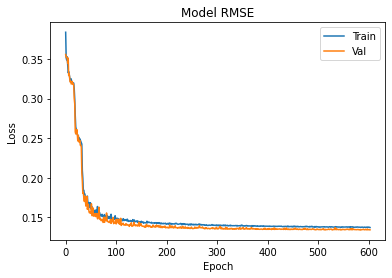

Training RMSE is
0.13708584010601044
Validation RMSE is
0.1339912712574005
Training loss is
0.0187925286591053
Validation loss is
0.01795366406440735


In [4]:
# Error Graph
from matplotlib import pyplot as plt
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 

train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)


In [6]:

#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd 
import numpy as np 
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

#gdd.download_file_from_google_drive(file_id='1jWa1UK8cxcCuEX_Chs1zm4hfa_j_Q-Ki',
                                   #dest_path='/content/sample_data/HPLC_NUM.hdf5',
                                   #unzip=False)
#Load Model
model = load_model('/content/sample_data/HPLC_NUM.hdf5', compile= True)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
Drug_1_CID =  24872560#@param {type:"number"}
Drug_2_CID =  24872560#@param {type:"number"}
Rt_Drug_1 =  4#@param {type:"number"}
Rt_Drug_2 =  6#@param {type:"number"}
Rt_Drug_1 = Rt_Drug_1/20
Rt_Drug_2 = Rt_Drug_2/20

Drug_1_CID = pcp.Compound.from_cid(Drug_1_CID)
Drug_2_CID = pcp.Compound.from_cid(Drug_2_CID)

FPD_1 = Drug_1_CID.cactvs_fingerprint
FPD_2 = Drug_2_CID.cactvs_fingerprint

List1 = [Rt_Drug_1, Rt_Drug_2]

List2 = list(FPD_1)
List3 = list(FPD_2)
List = List2 + List3
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1764].astype(float))


Y_prediction = model.predict(X_Predict)
Y_prediction = Y_prediction*100
Y_prediction = pd.DataFrame(Y_prediction)
print(Y_prediction)


1/1 [==============================] - 0s 102ms/step
           0          1          2          3          4          5
0  26.841003  12.952526  30.687841  15.747711  13.212296  21.321007


In [ ]:
from tabulate import tabulate
print(tabulate([['Methanol', Y_prediction.iloc[0:1,0:1]], ['Acetonitrile', Y_prediction.iloc[0:1,1:2]], ['Water', Y_prediction.iloc[0:1,2:3]], ['Buffer', Y_prediction.iloc[0:1,3:4]]], headers=['Solvent', 'Proportion(%)']))

Solvent       Proportion(%)
------------  ---------------
Methanol      0
              0  16.523994
Acetonitrile  1
              0  14.295761
Water         2
              0  2.9872
Buffer        3
              0  66.193047
